In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from tqdm.notebook import tnrange,tqdm
import pandas as pd
import os
import tikzplotlib

In [2]:
from diffusion_simulation import diffusion_simulation
from network import network

In [3]:
beta, s = 3.5, 1

In [5]:
params = {'sim_id':f'example', 'alpha':0.1, 'beta':beta,
          'noise_dist': 'logistic', 'noise_dist_param': s,
          'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
          'is_network_given':True, 'network_dir':f'../instances/example/edge.csv',  
          'is_value_given':True, 'value_dir':f'../instances/example/v.csv'
         }
    
G = network(params)
sample = diffusion_simulation(G,params)

Instance generated with 10 nodes.


/Users/linyunduan/Documents/Codes/Research/4_np_diffusion/revision_1/code/diffusion_simulation.py:112: ComplexWarning: Casting complex values to real discards the imaginary part
  stationary = stationary.astype(float)


In [6]:
L = 1/(4*s)
rho = beta * L
c = rho/(1-rho)/(1-rho/2)

normalized_centrality = (1-rho)*la.inv(np.identity(sample.G.n)-rho*sample.G.A) @ sample.G.b

df = pd.read_csv('../instances/example/results.csv')
error = np.abs(df['exact']-df['fp'])

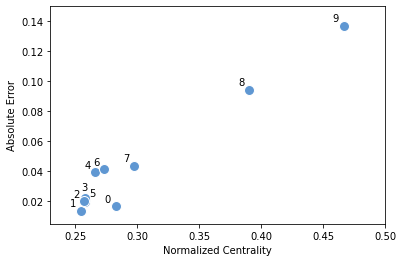

In [31]:
plt.scatter(normalized_centrality, error, c='#5f97d2', edgecolor='white', s=100)
plt.xlabel('Normalized Centrality')
plt.ylabel('Absolute Error')

for i in range(0,3):
    plt.text(normalized_centrality[i]-0.009, error[i]+0.003, i)
plt.text(normalized_centrality[3]-0.003, error[3]+0.005, 3)
plt.text(normalized_centrality[4]-0.009, error[4]+0.003, 4)
plt.text(normalized_centrality[5]+0.004, error[5]+0.003, 5)
for i in range(6,sample.G.n):
    plt.text(normalized_centrality[i]-0.009, error[i]+0.003, i)

plt.xlim(0.23,0.5)
plt.ylim(0.005,0.15)
tikzplotlib.save("centrality.tex", axis_height='9cm', axis_width='12cm')

In [8]:
df = pd.read_csv(f'../instances/example/beta3.5_L0.25/results.csv')
df['fp'] - df['exact']

0    0.016614
1    0.013723
2    0.019858
3   -0.022156
4    0.039259
5   -0.020238
6    0.041437
7   -0.043764
8    0.094419
9    0.137060
dtype: float64

In [10]:
df_0 = pd.read_csv(f'../instances/example/beta0_L0.25/results.csv')
df_0['fp'] - df['exact']

0   -0.358999
1   -0.369660
2   -0.339134
3   -0.125260
4   -0.303199
5   -0.162394
6   -0.305516
7   -0.276950
8   -0.453606
9   -0.408956
dtype: float64

In [71]:
a_mm = df_0['fp'].values

In [72]:
L = 0.25
l_beta = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]
l_MAPE, l_MAPE_mm, l_total = [], [], []
for beta in l_beta:
    df = pd.read_csv(f'../instances/example/beta{beta}_L0.25/results.csv')
    MAPE = np.mean(np.abs(df['exact']-df['fp'])/df['exact'])*100
    MAPE_mm = np.mean(np.abs(df['exact']-a_mm)/df['exact'])*100
    total = np.mean(df['exact'])
    l_MAPE.append(MAPE)
    l_MAPE_mm.append(MAPE_mm)
    l_total.append(total)

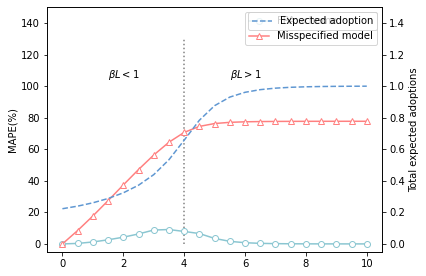

In [73]:
fig, ax1 = plt.subplots(figsize=(6, 4.5))
ax2 = ax1.twinx()
ax1.plot(l_beta, l_MAPE, c='#8ac6d1', marker='o', markerfacecolor='white', label='FPA scheme')
ax1.plot(l_beta, l_MAPE_mm, c='#ff8080', marker='^', markerfacecolor='white', label='Misspecified model')
ax2.plot(l_beta, l_total, c='#5f97d2', linestyle='--', label='Expected adoption')
ax1.plot([4,4],[0,130], linestyle=':', c='gray',zorder=-10)
plt.xlabel('Network effect strength $\\beta$')
ax1.set_ylabel('MAPE(%)')
ax2.set_ylabel('Total expected adoptions')
ax1.legend()
ax2.legend()
ax1.set_ylim(-5,150)
ax2.set_ylim(-0.05, 1.5)
ax1.text(1.5,105,'$\\beta L<1$')
ax1.text(5.5,105,'$\\beta L>1$')
tikzplotlib.save("beta.tex", axis_height='9cm', axis_width='12cm')

In [64]:
beta = 3.5
l_L = [0.0625, 0.125, 0.25, 0.5, 1, 1.5, 2, 2.5]
l_MAPE, l_MAPE_mm, l_MAPE_1, l_total = [], [], [], []

for L in l_L:
    s = 1/(4*L)
    df = pd.read_csv(f'../instances/example/beta0_L{L}/results.csv')
    a_mm = df['fp'].values
    df = pd.read_csv(f'../instances/example/beta3.5_L{L}/results.csv')
    MAPE = np.mean(np.abs(df['exact']-df['fp'])/df['exact'])*100
    MAPE_mm = np.mean(np.abs(df['exact']-a_mm)/df['exact'])*100
    total = np.mean(df['exact'])
    df = pd.read_csv(f'../instances/example/beta3.5_L{L}_1/results.csv')
    MAPE_1 = np.mean(np.abs(df['exact']-df['fp'])/df['exact'])*100
    l_MAPE.append(MAPE)
    l_MAPE_mm.append(MAPE_mm)
    l_total.append(total)
    l_MAPE_1.append(MAPE_1)

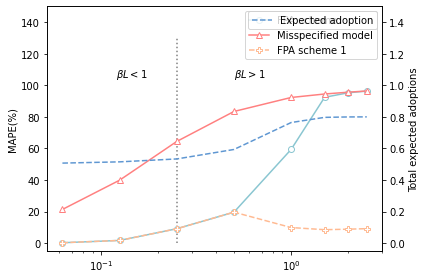

In [69]:
fig, ax1 = plt.subplots(figsize=(6, 4.5))
ax2 = ax1.twinx()
ax1.plot(l_L, l_MAPE, c='#8ac6d1', marker='o', markerfacecolor='white', label='FPA scheme')
ax1.plot(l_L, l_MAPE_mm, c='#ff8080', marker='^', markerfacecolor='white', label='Misspecified model')
ax1.plot(l_L, l_MAPE_1, c='#ffba92', marker='P', linestyle='--', markerfacecolor='white', label='FPA scheme 1')
ax2.plot(l_L, l_total, c='#5f97d2', linestyle='--', label='Expected adoption')
ax1.plot([1/4,1/4],[0,130], linestyle=':', c='gray',zorder=-10)
plt.xlabel('$L$')
plt.xscale("log")
ax1.set_ylabel('MAPE(%)')
ax2.set_ylabel('Total expected adoptions')
ax1.legend()
ax2.legend()
ax1.set_ylim(-5,150)
ax2.set_ylim(-0.05, 1.5)
ax1.text(0.12,105,'$\\beta L<1$')
ax1.text(0.5,105,'$\\beta L>1$')
tikzplotlib.save("L.tex", axis_height='9cm', axis_width='12cm')